In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math as m
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Fruit/Train',target_size=(200,200),batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/Fruit/Validation',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 150 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [6]:
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential, load_model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(200,200,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=30,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/30
50/50 [==============================] - 101s 2s/step - loss: 2.5146 - accuracy: 0.0933 - val_loss: 2.2734 - val_accuracy: 0.1000
Epoch 2/30
50/50 [==============================] - 9s 171ms/step - loss: 2.2758 - accuracy: 0.1200 - val_loss: 2.1770 - val_accuracy: 0.2200
Epoch 3/30
50/50 [==============================] - 9s 173ms/step - loss: 2.1063 - accuracy: 0.2067 - val_loss: 1.8175 - val_accuracy: 0.2200
Epoch 4/30
50/50 [==============================] - 9s 172ms/step - loss: 1.9390 - accuracy: 0.2533 - val_loss: 1.7330 - val_accuracy: 0.3000
Epoch 5/30
50/50 [==============================] - 9s 172ms/step - loss: 1.8156 - accuracy: 0.2867 - val_loss: 1.4549 - val_accuracy: 0.4400
Epoch 6/30
50/50 [==============================] - 9s 172ms/step - loss: 1.7129 - accuracy: 0.2800 - val_loss: 1.5423 - val_accuracy: 0.2800
Epoch 7/30
50/50 [==============================] - 9s 172ms/step - loss: 1.6818 - accuracy: 0.2600 - val_loss: 1.4339 - val_accuracy: 0.4800
Epoch 8

In [7]:
from keras.models import Sequential, load_model

In [8]:
validation_dataset.class_indices

{'Cam': 0,
 'Nho': 1,
 'Táo': 2,
 'chôm chôm': 3,
 'chuối': 4,
 'dưa hấu': 5,
 'dừa': 6,
 'mít': 7,
 'thơm': 8,
 'xoài': 9}

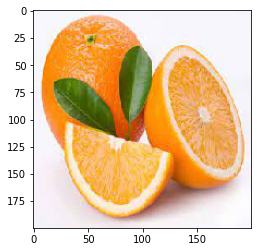

Cam


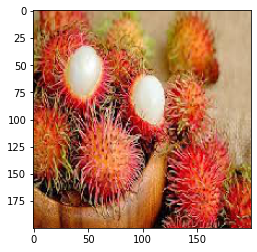

Chom_chom


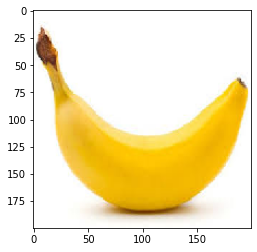

Chuoi


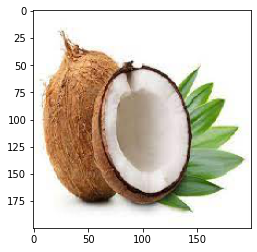

Dua


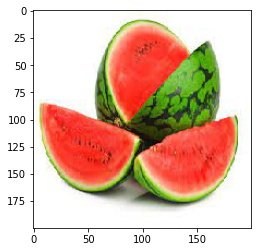

Dua_hau


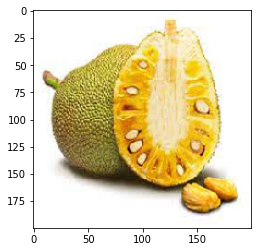

Mit


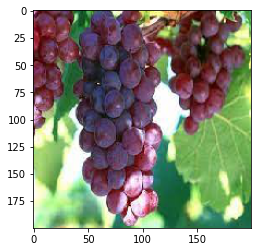

Nho


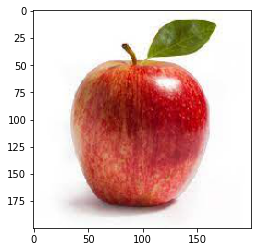

Tao


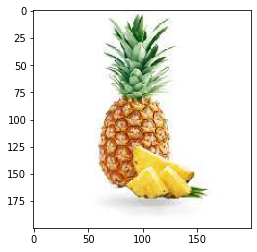

Thom


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

path = '/content/drive/MyDrive/Fruit/Test'

for i in range (9):
    img = load_img(path+'//'+str(i+1)+'.jpg',target_size=(200,200))
    plt.imshow(img)
    plt.show()

    img = img_to_array(img)
    img=np.reshape(img,(1,200,200,3))
    img = img.astype('float32')
    img = img/255
    predict =  np.argmax(model.predict(img))
    if predict==0:
      print("Cam")
    elif predict==1: 
      print("Nho")
    elif predict==2: 
      print("Tao")
    elif predict==3: 
      print("Chom_chom")
    elif predict==4: 
      print("Chuoi")
    elif predict==5: 
      print("Dua_hau")
    elif predict==6: 
      print("Dua")
    elif predict==7: 
      print("Mit")
    elif predict==8: 
      print("Thom")
    elif predict==9: 
      print("Xoai")